<a href="https://colab.research.google.com/github/SKalanidhi/Insurance-Pricing-Forecast/blob/main/Medical_Insurance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 17.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Loading Dataset
df = pd.read_csv('Medical Insurance.zip')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Basic Info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Encode Categorical Variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

Text(0.5, 1.0, 'Correlation Heatmap')

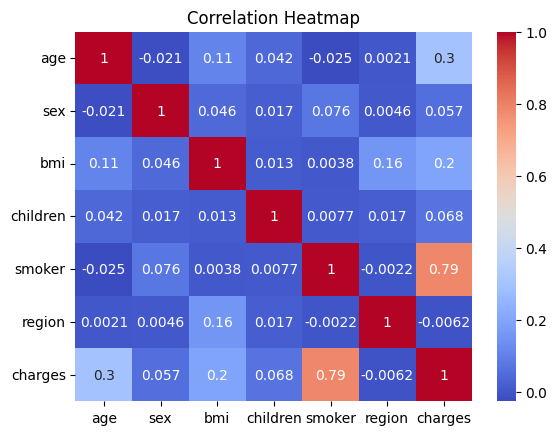

In [ ]:
#EDA - Correlation and Visuals
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Impact of Smoking on Insurance Charges')

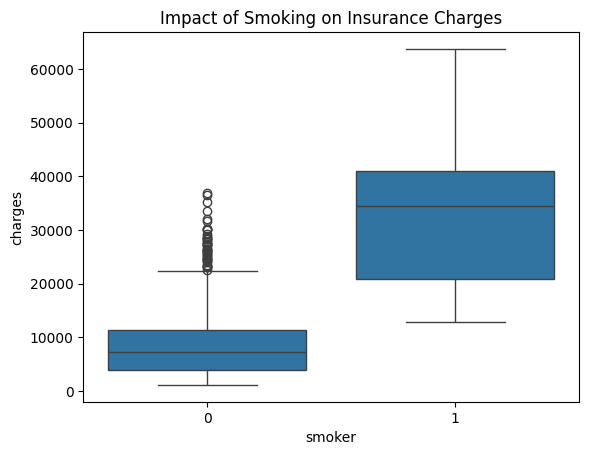

In [ ]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Impact of Smoking on Insurance Charges')

In [ ]:
#Feature-Target Split
X = df.drop('charges', axis=1)
y = df['charges']

In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predictions
y_pred = model.predict(X_test)

In [ ]:
#Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 4186.508898366433
RMSE: 5799.587091438356
R² Score: 0.7833463107364539


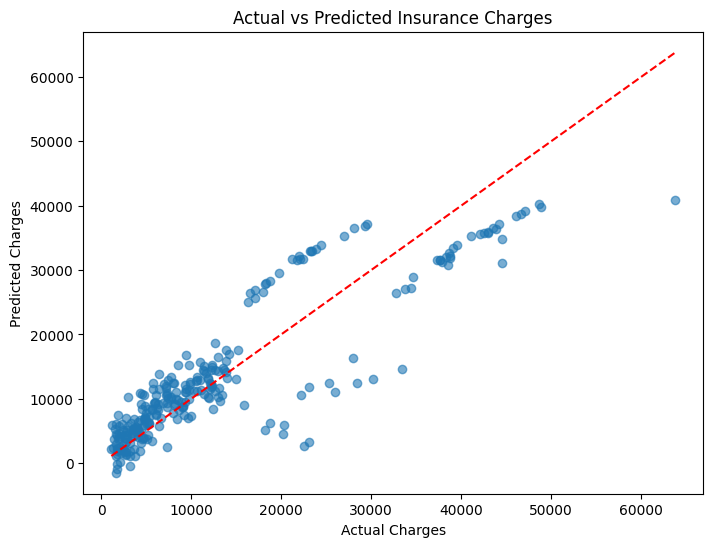

In [ ]:
#Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()